No Place for Hate

We seek to find the correlation of the occurrence of Hate Crimes and:
* Education
* Poverty
* Unemployment Rates




In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import linregress


In [2]:
#read Education csv file and review the sample rows
edu_data = pd.read_csv("Resources/EducationReport.csv")
#create a new dataframe with only needed columns for years 2014-2018
edu_data_df = pd.DataFrame(edu_data)
edu_data_mycolm = edu_data_df[["Unnamed: 0", "Total.4", "Urban.4", "Rural.4"]]
#renamed the columns to have more meaningful names
edu_data_upd = edu_data_mycolm.rename(columns={"Unnamed: 0" : "area_name", "Total.4" : "Total Edu 2014-18", "Urban.4" : "Total Edu Urban 2024-18", "Rural.4" : "Total Edu Rural 2014-18"})
#dropped the first row of the data set with column titles for consistency
edu_data_final = edu_data_upd.drop([0,1], axis=0)
edu_data_final.head(3)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18
2,Alabama,24.90%,28.00%,15.20%
3,Alaska,29.20%,31.80%,23.90%
4,Arizona,28.90%,29.60%,15.80%


In [3]:
unempl_data = pd.read_csv("Resources/Unemployment.csv", encoding="ISO-8859-1")

In [4]:
#create the column with average data for years 2014-18 and add it to the dataset
unempl_data["Average Unempl 2014-18"] =(unempl_data["Unemployment_rate_2018"] + unempl_data["Unemployment_rate_2017"]
+ unempl_data["Unemployment_rate_2016"] + unempl_data["Unemployment_rate_2015"] + 
unempl_data["Unemployment_rate_2014"])/4
unempl_data["Average Unempl 2014-18"] = unempl_data["Average Unempl 2014-18"].map("{:.2f}%".format)
unempl_data.head(3)

,FIPStxt,Stabr,area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Average Unempl 2014-18
0,0,US,United States,NaN,NaN,NaN,"142,601,667","136,904,680","5,696,987",4.0,...,"155,102,319","6,286,707",3.9,"163,100,055","157,115,247","5,984,808",3.7,"61,937",NaN,6.10%
1,1000,AL,Alabama,NaN,NaN,NaN,"2,133,223","2,035,594","97,629",4.6,...,"2,130,845","85,782",3.9,"2,241,747","2,174,483","67,264",3.0,"49,881",100.0,6.73%
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,"21,720","20,846",874,4.0,...,"25,261",935,3.6,"26,172","25,458",714,2.7,"59,338",119.0,5.85%


In [5]:
#filter dataset to the state level - remove counties (the columns "rural urban code" & "metro 2013" are empty for the states)
unempl_data['Rural_urban_continuum_code_2013'].replace('', np.nan, inplace=True)
unempl_state_interim = unempl_data[unempl_data['Rural_urban_continuum_code_2013'].isnull()]
unempl_state_interim
unempl_data_clean = unempl_state_interim[unempl_state_interim['Metro_2013']!=0]
unempl_data_clean.head(10)

,FIPStxt,Stabr,area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Average Unempl 2014-18
0,0,US,United States,NaN,NaN,NaN,"142,601,667","136,904,680","5,696,987",4.0,...,"155,102,319","6,286,707",3.9,"163,100,055","157,115,247","5,984,808",3.7,"61,937",NaN,6.10%
1,1000,AL,Alabama,NaN,NaN,NaN,"2,133,223","2,035,594","97,629",4.6,...,"2,130,845","85,782",3.9,"2,241,747","2,174,483","67,264",3.0,"49,881",100.0,6.73%
69,2000,AK,Alaska,NaN,NaN,NaN,"319,511","299,146","20,365",6.4,...,"329,901","22,761",6.5,"347,779","326,430","21,349",6.1,"74,912",100.0,8.55%
102,4000,AZ,Arizona,NaN,NaN,NaN,"2,509,883","2,410,581","99,302",4.0,...,"3,260,518","162,065",4.7,"3,551,260","3,384,504","166,756",4.7,"59,079",100.0,6.95%
118,5000,AR,Arkansas,NaN,NaN,NaN,"1,258,301","1,204,695","53,606",4.3,...,"1,303,995","49,310",3.6,"1,362,642","1,314,290","48,352",3.5,"47,094",100.0,5.58%
194,6000,CA,California,NaN,NaN,NaN,"16,867,808","16,033,179","834,629",4.9,...,"18,460,725","820,096",4.3,"19,411,572","18,627,378","784,194",4.0,"75,250",100.0,7.03%
253,8000,CO,Colorado,NaN,NaN,NaN,"2,359,515","2,294,408","65,107",2.8,...,"2,983,498","97,163",3.2,"3,148,766","3,062,098","86,668",2.8,"71,949",100.0,4.58%
318,9000,CT,Connecticut,NaN,NaN,NaN,"1,764,126","1,721,913","42,213",2.4,...,"1,821,891","78,773",4.1,"1,913,530","1,842,164","71,366",3.7,"76,366",100.0,6.62%
327,10000,DE,Delaware,NaN,NaN,NaN,"413,500","398,027","15,473",3.7,...,"463,542","18,231",3.8,"487,263","468,844","18,419",3.8,"65,467",100.0,5.88%
331,11000,DC,District of Columbia,NaN,NaN,NaN,"310,469","293,086","17,383",5.6,...,"381,703","23,036",5.7,"409,969","387,482","22,487",5.5,"82,533",100.0,8.17%


In [6]:
# ADD HERE!!!!!!

In [7]:
crime_data_df = pd.read_csv("Resources/estimated_crimes_1979_2018_rev1.csv")
year_list = ["2014", "2015", "2016", "2017", "2018"]
crime_data_df = crime_data_df[crime_data_df.year.isin(year_list)]
crime_data_df.head(50)

,year,state_abbr,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
35,2014,NaN,318907401,1153022,14164,84864.0,118027.0,322905,731089,8209010,1713153,5809054,686803,NaN
36,2015,NaN,320896618,1199310,15883,91261.0,126134.0,328109,764057,8024115,1587564,5723488,713063,NaN
37,2016,NaN,323405935,1285606,17413,96970.0,132414.0,332797,802982,7928530,1516405,5644835,767290,NaN
73,2014,AK,737046,4684,41,553.0,771.0,629,3243,20334,3150,15445,1739,NaN
74,2015,AK,737709,5391,59,648.0,900.0,761,3671,20806,3511,15249,2046,NaN
75,2016,AK,741522,5966,52,754.0,1053.0,850,4011,24876,4053,17766,3057,NaN
76,2017,AK,739786,6338,62,NaN,1074.0,952,4250,26203,4167,17782,4254,NaN
77,2018,AK,737438,6526,47,NaN,1192.0,896,4391,24339,3979,16364,3996,NaN
113,2014,AL,4846411,20727,276,1425.0,2005.0,4702,13744,154087,39723,104223,10141,NaN
114,2015,AL,4853875,22957,348,1449.0,2037.0,4612,15960,144785,35265,99182,10338,NaN


In [8]:
crime_data_df.dropna(subset=['state_abbr'], how='any')
crime_data_df.head(10)

,year,state_abbr,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
35,2014,NaN,318907401,1153022,14164,84864.0,118027.0,322905,731089,8209010,1713153,5809054,686803,NaN
36,2015,NaN,320896618,1199310,15883,91261.0,126134.0,328109,764057,8024115,1587564,5723488,713063,NaN
37,2016,NaN,323405935,1285606,17413,96970.0,132414.0,332797,802982,7928530,1516405,5644835,767290,NaN
73,2014,AK,737046,4684,41,553.0,771.0,629,3243,20334,3150,15445,1739,NaN
74,2015,AK,737709,5391,59,648.0,900.0,761,3671,20806,3511,15249,2046,NaN
75,2016,AK,741522,5966,52,754.0,1053.0,850,4011,24876,4053,17766,3057,NaN
76,2017,AK,739786,6338,62,NaN,1074.0,952,4250,26203,4167,17782,4254,NaN
77,2018,AK,737438,6526,47,NaN,1192.0,896,4391,24339,3979,16364,3996,NaN
113,2014,AL,4846411,20727,276,1425.0,2005.0,4702,13744,154087,39723,104223,10141,NaN
114,2015,AL,4853875,22957,348,1449.0,2037.0,4612,15960,144785,35265,99182,10338,NaN


In [9]:
crime_data_df = crime_data_df.drop(columns={"rape_legacy", "caveats"})
crime_data_df.count()

year                   260
state_abbr             255
population             260
violent_crime          260
homicide               260
rape_revised           260
robbery                260
aggravated_assault     260
property_crime         260
burglary               260
larceny                260
motor_vehicle_theft    260
dtype: int64

In [10]:
crime_data_df["Total Crimes per 100k"] = (crime_data_df["violent_crime"] + crime_data_df["homicide"]
+ crime_data_df["rape_revised"] + crime_data_df["robbery"] 
+ crime_data_df["aggravated_assault"] + crime_data_df["property_crime"] 
+ crime_data_df["burglary"] + crime_data_df["larceny"] 
+ crime_data_df["motor_vehicle_theft"]) / 100000
crime_data_df.head()

,year,state_abbr,population,violent_crime,homicide,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,Total Crimes per 100k
35,2014,NaN,318907401,1153022,14164,118027.0,322905,731089,8209010,1713153,5809054,686803,187.57227
36,2015,NaN,320896618,1199310,15883,126134.0,328109,764057,8024115,1587564,5723488,713063,184.81723
37,2016,NaN,323405935,1285606,17413,132414.0,332797,802982,7928530,1516405,5644835,767290,184.28272
73,2014,AK,737046,4684,41,771.0,629,3243,20334,3150,15445,1739,0.50036
74,2015,AK,737709,5391,59,900.0,761,3671,20806,3511,15249,2046,0.52394


In [11]:
crime_data_df_clean = crime_data_df[["year", "state_abbr", "Total Crimes per 100k"]]
crime_data_df_clean = crime_data_df_clean.rename(columns={"state_abbr": "Stabr"})
crime_data_df_clean.head(20)

,year,Stabr,Total Crimes per 100k
35,2014,NaN,187.57227
36,2015,NaN,184.81723
37,2016,NaN,184.28272
73,2014,AK,0.50036
74,2015,AK,0.52394
75,2016,AK,0.61684
76,2017,AK,0.65082
77,2018,AK,0.61730
113,2014,AL,3.49628
114,2015,AL,3.35484


In [12]:
state_merge = crime_data_df_clean.groupby(["Stabr"])
avg_crime = state_merge["Total Crimes per 100k"].mean()
avg_crime

Stabr
AK     0.581852
AL     3.376140
AR     2.228428
AZ     4.726068
CA    23.015516
CO     3.330256
CT     1.455180
DC     0.789492
DE     0.593608
FL    12.649016
GA     6.881760
HI     0.968036
IA     1.431668
ID     0.647616
IL     6.208352
IN     3.791596
KS     1.825092
KY     2.113416
LA     3.640164
MA     2.633612
MD     3.331336
ME     0.476780
MI     4.596404
MN     2.657164
MO     4.034160
MS     1.797260
MT     0.614296
NC     6.184448
ND     0.373220
NE     0.979216
NH     0.473340
NJ     3.244400
NM     1.846048
NV     1.884424
NY     7.604452
OH     6.531456
OK     2.654028
OR     2.655856
PA     5.210824
RI     0.441124
SC     3.721176
SD     0.395532
TN     4.747576
TX    17.404372
UT     1.852316
VA     3.431976
VT     0.201060
WA     5.326752
WI     2.520212
WV     0.817300
WY     0.245544
Name: Total Crimes per 100k, dtype: float64

In [13]:
avg_crime_df = pd.DataFrame(avg_crime)
avg_crime_df = avg_crime_df.reset_index()
avg_crime_df

,Stabr,Total Crimes per 100k
0,AK,0.581852
1,AL,3.376140
2,AR,2.228428
3,AZ,4.726068
4,CA,23.015516
5,CO,3.330256
6,CT,1.455180
7,DC,0.789492
8,DE,0.593608
9,FL,12.649016


In [14]:
avg_crime_and_unemp = pd.merge(unempl_data_clean, avg_crime_df, on="Stabr")
avg_crime_and_unemp.head()

,FIPStxt,Stabr,area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Average Unempl 2014-18,Total Crimes per 100k
0,1000,AL,Alabama,NaN,NaN,NaN,"2,133,223","2,035,594","97,629",4.6,...,"85,782",3.9,"2,241,747","2,174,483","67,264",3.0,"49,881",100.0,6.73%,3.376140
1,2000,AK,Alaska,NaN,NaN,NaN,"319,511","299,146","20,365",6.4,...,"22,761",6.5,"347,779","326,430","21,349",6.1,"74,912",100.0,8.55%,0.581852
2,4000,AZ,Arizona,NaN,NaN,NaN,"2,509,883","2,410,581","99,302",4.0,...,"162,065",4.7,"3,551,260","3,384,504","166,756",4.7,"59,079",100.0,6.95%,4.726068
3,5000,AR,Arkansas,NaN,NaN,NaN,"1,258,301","1,204,695","53,606",4.3,...,"49,310",3.6,"1,362,642","1,314,290","48,352",3.5,"47,094",100.0,5.58%,2.228428
4,6000,CA,California,NaN,NaN,NaN,"16,867,808","16,033,179","834,629",4.9,...,"820,096",4.3,"19,411,572","18,627,378","784,194",4.0,"75,250",100.0,7.03%,23.015516


In [15]:
#pick the average column for years 2014-2018
unempl_data_mycolm = avg_crime_and_unemp[["area_name", "Average Unempl 2014-18", "Total Crimes per 100k"]]
unempl_data_mycolm.head(3)

,area_name,Average Unempl 2014-18,Total Crimes per 100k
0,Alabama,6.73%,3.376140
1,Alaska,8.55%,0.581852
2,Arizona,6.95%,4.726068


In [16]:
# Kamran poverty work
load_poverty = ("Resources/PovertyReport.csv")
poverty_df = pd.read_csv(load_poverty)
poverty_df = poverty_df.drop(columns={"Textbox98", "Textbox99", "total_est_pct_Bmin2",
                                     "total_est_pct_Bmax2", "under18_pct_Bmin2", "under18_pct_Bmax2"})
poverty_df = poverty_df.rename(columns={"state_National": "area_name",
                                       "total_est_pct2": "Poverty (2018)",
                                       "under18_pct2": "Under 18 in Poverty (2018)"})
poverty_df.head(3)

,area_name,Poverty (2018),Under 18 in Poverty (2018)
0,Alabama,16.8,23.9
1,Alaska,11.1,14.5
2,Arizona,14.1,20.4


In [17]:
#formatting the dataset - add the "%" signs
poverty_df["Poverty (2018)"] = poverty_df["Poverty (2018)"].map("{:.2f}%".format)
poverty_df["Under 18 in Poverty (2018)"] = poverty_df["Under 18 in Poverty (2018)"].map("{:.2f}%".format)
poverty_df.head(3)

,area_name,Poverty (2018),Under 18 in Poverty (2018)
0,Alabama,16.80%,23.90%
1,Alaska,11.10%,14.50%
2,Arizona,14.10%,20.40%


In [18]:
#add and read the hate crime file
hate_crime = ("Resources/hate_crimes538.csv")
hate_crime_df = pd.read_csv(hate_crime)
hate_crime_df.head(3)

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928


In [19]:
#pick the needed columns from the hate crime file
hate_crime_colm = hate_crime_df[["state", "median_household_income", "hate_crimes_per_100k_splc"]]
hate_crime_colm = hate_crime_colm.rename(columns={"state" : "area_name"})
hate_crime_colm.head(3)

,area_name,median_household_income,hate_crimes_per_100k_splc
0,Alabama,42278,0.125839
1,Alaska,67629,0.143740
2,Arizona,49254,0.225320


In [20]:
# formatted column
hate_crime_colm["median_household_income"] = hate_crime_colm["median_household_income"].map("${:.2f}".format)
hate_crime_colm.head(3)

,area_name,median_household_income,hate_crimes_per_100k_splc
0,Alabama,$42278.00,0.125839
1,Alaska,$67629.00,0.143740
2,Arizona,$49254.00,0.225320


In [21]:
# Merge the Education Dataframe with Enemployment Dataframe
merged_df = pd.merge(edu_data_final,unempl_data_mycolm, on="area_name")
merged_df.head(3)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Average Unempl 2014-18,Total Crimes per 100k
0,Alabama,24.90%,28.00%,15.20%,6.73%,3.376140
1,Alaska,29.20%,31.80%,23.90%,8.55%,0.581852
2,Arizona,28.90%,29.60%,15.80%,6.95%,4.726068


In [22]:
#add Poverty Dataframe to the merged data
merged_df1 = pd.merge(merged_df, poverty_df, on="area_name")
merged_df1.head(3)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Average Unempl 2014-18,Total Crimes per 100k,Poverty (2018),Under 18 in Poverty (2018)
0,Alabama,24.90%,28.00%,15.20%,6.73%,3.376140,16.80%,23.90%
1,Alaska,29.20%,31.80%,23.90%,8.55%,0.581852,11.10%,14.50%
2,Arizona,28.90%,29.60%,15.80%,6.95%,4.726068,14.10%,20.40%


In [23]:
#ready for the final code
#add the Hate Crime data to the merged dataframe

merged_df_fin = pd.merge(merged_df1,hate_crime_colm, on="area_name")
merged_df_fin.head(3)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Average Unempl 2014-18,Total Crimes per 100k,Poverty (2018),Under 18 in Poverty (2018),median_household_income,hate_crimes_per_100k_splc
0,Alabama,24.90%,28.00%,15.20%,6.73%,3.376140,16.80%,23.90%,$42278.00,0.125839
1,Alaska,29.20%,31.80%,23.90%,8.55%,0.581852,11.10%,14.50%,$67629.00,0.143740
2,Arizona,28.90%,29.60%,15.80%,6.95%,4.726068,14.10%,20.40%,$49254.00,0.225320


In [24]:
#add Region csv and merge
regions_df = pd.read_csv("Resources/Regions.csv")
regions_df.head()

,area_name,region
0,Alabama,Southeast
1,Alaska,West
2,Arizona,Southwest
3,Arkansas,Southeast
4,California,West


In [25]:
merged_df_fin = pd.merge(merged_df_fin,regions_df, on="area_name")

# Final Merged DataFrame

In [26]:
merged_df_fin.head()

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Average Unempl 2014-18,Total Crimes per 100k,Poverty (2018),Under 18 in Poverty (2018),median_household_income,hate_crimes_per_100k_splc,region
0,Alabama,24.90%,28.00%,15.20%,6.73%,3.376140,16.80%,23.90%,$42278.00,0.125839,Southeast
1,Alaska,29.20%,31.80%,23.90%,8.55%,0.581852,11.10%,14.50%,$67629.00,0.143740,West
2,Arizona,28.90%,29.60%,15.80%,6.95%,4.726068,14.10%,20.40%,$49254.00,0.225320,Southwest
3,Arkansas,22.60%,26.80%,16.00%,5.58%,2.228428,16.80%,23.80%,$44922.00,0.069061,Southeast
4,California,33.30%,33.50%,23.20%,7.03%,23.015516,12.80%,17.40%,$60487.00,0.255805,West


In [27]:
# group by regions
region_merge=merged_df_fin.groupby("region")
region_merge.describe()

Total Crimes per 100k                                          \
                          count      mean       std       min       25%   
region                                                                    
Midwest                    13.0  2.881345  2.032382  0.373220  1.431668   
Northeast                  13.0  2.321260  2.256836  0.201060  0.476780   
Southeast                   9.0  4.992974  3.324127  1.797260  3.376140   
Southwest                   4.0  6.657629  7.266442  1.846048  2.452033   
West                       11.0  3.945194  6.484045  0.581852  0.807826   

                                         hate_crimes_per_100k_splc            \
                50%       75%        max                     count      mean   
region                                                                         
Midwest    2.520212  4.034160   6.531456                      11.0  0.283501   
Northeast  1.455180  3.331336   7.604452                      13.0  0.407100   
Southeast  3.640164  6.184448  12.649016                       9.0  0.165246   
Southwest  3.690048  7.895644  17.404372                       4.0  0.216836   
West       1.884424  2.993056  23.015516                       9.0  0.355369   

                                                                       
                std       min       25%       50%       75%       max  
region                                                                 
Midwest    0.155453  0.105152  0.187619  0.226197  0.364088  0.627480  
Northeast  0.374744  0.078306  0.209894  0.324149  0.370439  1.522302  
Southeast  0.095242  0.067447  0.109733  0.125839  0.199938  0.363249  
Southwest  0.066046  0.133629  0.193595  0.219452  0.242693  0.294811  
West       0.263226  0.124208  0.141673  0.255805  0.495491  0.832850

In [28]:
count_region=region_merge["hate_crimes_per_100k_splc"].mean()
count_region

region
Midwest      0.283501
Northeast    0.407100
Southeast    0.165246
Southwest    0.216836
West         0.355369
Name: hate_crimes_per_100k_splc, dtype: float64

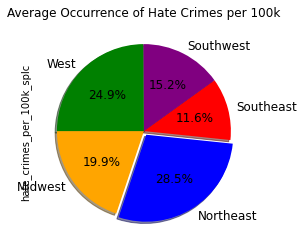

In [29]:
# Look at occurences of Hate Crimes across regions
explode = (0, 0.05, 0, 0, 0)
count_region.plot(kind='pie', y='region', \
                        title="Average Occurrence of Hate Crimes per 100k",startangle=180,\
                        autopct='%1.1f%%',shadow=True, explode= explode, fontsize=12, colors =["orange","blue", "red","purple", "green"],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart
plt.show()

In [30]:
merged_df_fin.head()

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Average Unempl 2014-18,Total Crimes per 100k,Poverty (2018),Under 18 in Poverty (2018),median_household_income,hate_crimes_per_100k_splc,region
0,Alabama,24.90%,28.00%,15.20%,6.73%,3.376140,16.80%,23.90%,$42278.00,0.125839,Southeast
1,Alaska,29.20%,31.80%,23.90%,8.55%,0.581852,11.10%,14.50%,$67629.00,0.143740,West
2,Arizona,28.90%,29.60%,15.80%,6.95%,4.726068,14.10%,20.40%,$49254.00,0.225320,Southwest
3,Arkansas,22.60%,26.80%,16.00%,5.58%,2.228428,16.80%,23.80%,$44922.00,0.069061,Southeast
4,California,33.30%,33.50%,23.20%,7.03%,23.015516,12.80%,17.40%,$60487.00,0.255805,West


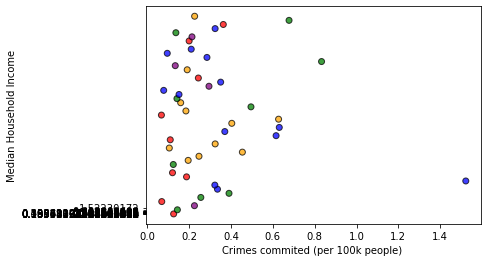

In [31]:
region_color= {"Southeast": "r", "Northeast": "b", 
              "West": "g", "Midwest": "orange", 
              "Southwest": "purple"}
x_axis= merged_df_fin.iloc[:,9]
tick_locations=x_axis
y_axis =merged_df_fin.iloc[:,8]
plt.scatter(x_axis, y_axis, color=[region_color[i] for i in merged_df_fin["region"]], edgecolors="black", alpha=0.75)
plt.yticks(tick_locations, x_axis, rotation="horizontal")

plt.xlabel('Crimes commited (per 100k people) ')
# plt.ylabel('Hate Crimes commited (per 100k people)')
plt.ylabel('Median Household Income')
plt.show()
# THESE ARE STAND IN'S- I WAS LOOKING AT DIFFERENT COREELATIONS - WE NEED TO DECIDE WHAT CATTER PLOTS TO USE AND THEM MAKE THEM PRETTY

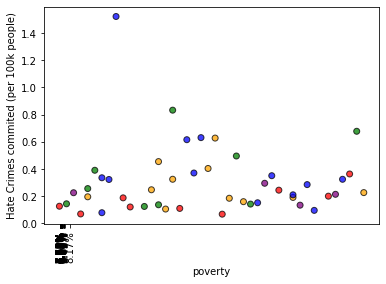

In [32]:
region_color= {"Southeast": "r", "Northeast": "b", 
              "West": "g", "Midwest": "orange", 
              "Southwest": "purple"}
x_axis= merged_df_fin.iloc[:,4]
# tick_locations=np.arange(3, 10, .5)
y_axis =merged_df_fin.iloc[:,9]
plt.scatter(x_axis, y_axis, color=[region_color[i] for i in merged_df_fin["region"]], edgecolors="black", alpha=0.75)
plt.xticks(tick_locations, x_axis, rotation="vertical")

plt.xlabel('poverty')
plt.ylabel('Hate Crimes commited (per 100k people)')
# plt.xlim([0, 25]) 
# plt.ylim([0, 2])
# plt.ylabel('Crimes commited (per 100k people)')
plt.show()
# THESE ARE STAND IN'S- I WAS LOOKING AT DIFFERENT COREELATIONS - WE NEED TO DECIDE WHAT CATTER PLOTS TO USE AND THEM MAKE THEM PRETTY

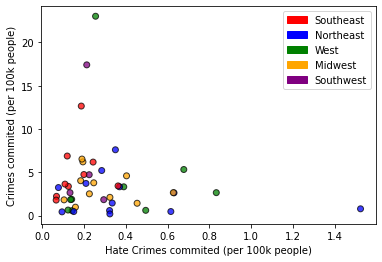

In [33]:
region_color= {"Southeast": "r", "Northeast": "b", 
              "West": "g", "Midwest": "orange", 
              "Southwest": "purple"}

labels = list(region_color.keys())
handles = [plt.Rectangle((0,0),1,1, color=region_color[label]) for label in labels]

x_axis= merged_df_fin.iloc[:,9]
tick_locations=x_axis
y_axis =merged_df_fin.iloc[:,5]
plt.scatter(x_axis, y_axis, color=[region_color[i] for i in merged_df_fin["region"]], edgecolors="black", alpha=0.75)

plt.xlabel('Hate Crimes commited (per 100k people)')
plt.ylabel('Crimes commited (per 100k people)')
plt.legend(handles, labels, loc="upper right")

plt.show()
# THESE ARE STAND IN'S- I WAS LOOKING AT DIFFERENT COREELATIONS - WE NEED TO DECIDE WHAT CATTER PLOTS TO USE AND THEM MAKE THEM PRETTY

In [34]:
merged_df_fin.head()

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Average Unempl 2014-18,Total Crimes per 100k,Poverty (2018),Under 18 in Poverty (2018),median_household_income,hate_crimes_per_100k_splc,region
0,Alabama,24.90%,28.00%,15.20%,6.73%,3.376140,16.80%,23.90%,$42278.00,0.125839,Southeast
1,Alaska,29.20%,31.80%,23.90%,8.55%,0.581852,11.10%,14.50%,$67629.00,0.143740,West
2,Arizona,28.90%,29.60%,15.80%,6.95%,4.726068,14.10%,20.40%,$49254.00,0.225320,Southwest
3,Arkansas,22.60%,26.80%,16.00%,5.58%,2.228428,16.80%,23.80%,$44922.00,0.069061,Southeast
4,California,33.30%,33.50%,23.20%,7.03%,23.015516,12.80%,17.40%,$60487.00,0.255805,West


In [35]:
# merged_df_fin = merged_df_fin['Poverty (2018)'].apply(lambda x: x.rstrip("%")).astype(float)
# merged_df_fin_poverty['Poverty (2018)'] = float(merged_df_fin_poverty['Poverty (2018)'].replace("%",""))
# merged_df_fin_poverty['Poverty (2018)'] = pd.to_numeric(merged_df_fin_poverty['Poverty (2018)'], errors='coerce')
merged_df_fin.dtypes
# merged_df_fin_poverty = merged_df_fin.sort_values(by=['Poverty (2018)'])
# merged_df_fin_poverty.head()

area_name                      object
Total Edu 2014-18              object
Total Edu Urban 2024-18        object
Total Edu Rural 2014-18        object
Average Unempl 2014-18         object
Total Crimes per 100k         float64
Poverty (2018)                 object
Under 18 in Poverty (2018)     object
median_household_income        object
hate_crimes_per_100k_splc     float64
region                         object
dtype: object

In [36]:
merged_df_fin_poverty.info()

NameError: name 'merged_df_fin_poverty' is not defined

In [ ]:
merged_df_fin_poverty = merged_df_fin.sort_values(by=['Poverty (2018)'])
# tick_locations=np.arange(.3, .10, .1)
merged_df_fin_poverty.plot(kind="scatter", x="Poverty (2018)", y= "hate_crimes_per_100k_splc", grid=True)
# plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.xticks(rotation="vertical")
# plt.xlim([0, 20]) 
# plt.ylim([0, 20]) 
plt.show()

In [ ]:
# merged_df_fin_education = merged_df_fin.sort_values(by=['Total Edu 2014-18'])
# x_values = pd.to_numeric(merged_df_fin_poverty['Poverty (2018)'], errors='coerce')
# merged_df_fin_education['Total Edu 2014-18']= pd.to_numeric(merged_df_fin_education['Poverty (2018)'], errors='coerce')
# merged_df_fin_education['Total Edu 2014-18']= merged_df_fin['Poverty (2018)']
# x_values = merged_df_fin_education['Total Edu 2014-18'].astype('float') 
# y_values = merged_df_fin_education['hate_crimes_per_100k_splc']

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.scatter(x_values,y_values)

# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# plt.xlabel('Education')
# plt.ylabel('Hate Crime')

# print(f"R squared: {rvalue**2}")

# plt.show()

# merged_df_fin_education.plot(kind="scatter", x="Total Edu 2014-18", y= "hate_crimes_per_100k_splc", grid=True)
# # plt.xticks(tick_locations, x_axis, rotation="vertical")
# plt.xticks(rotation="vertical")
# # plt.xlim([0, 20]) 
# # plt.ylim([0, 20]) 

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# plt.show()

In [ ]:
merged_df_fin_education.info()

In [ ]:
merged_df_fin_income = merged_df_fin.sort_values(by=['median_household_income'])
merged_df_fin_income.plot(kind="scatter", x="median_household_income", y= "hate_crimes_per_100k_splc", grid=True)
# plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
merged_df_fin.head()

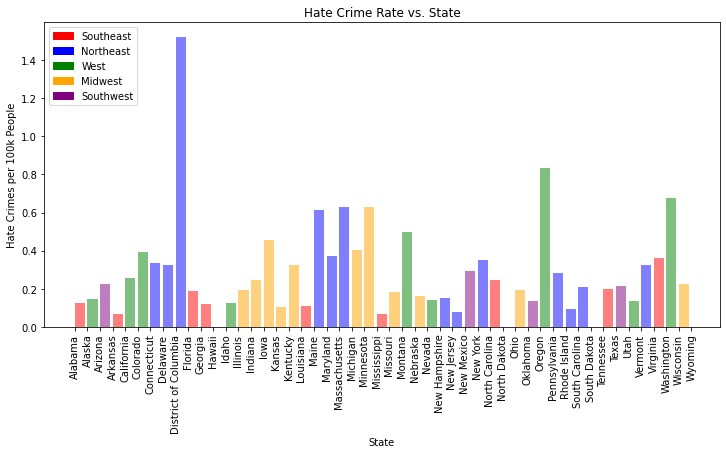

In [39]:
region_color= {"Southeast": "r", "Northeast": "b", 
              "West": "g", "Midwest": "orange", 
              "Southwest": "purple"}
labels = list(region_color.keys())
handles = [plt.Rectangle((0,0),1,1, color=region_color[label]) for label in labels]
# merged_df_fin["area_name"].plot(kind='bar', color=[region_color[i] for i in merged_df_fin["region"]])
x_axis=merged_df_fin["area_name"]
tick_locations=x_axis
y_axis =merged_df_fin['hate_crimes_per_100k_splc']
plt.figure(figsize=(10,6))
state_hate_crime = plt.bar(x_axis, y_axis, color=[region_color[i] for i in merged_df_fin["region"]], alpha=0.5, align="edge")
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.tight_layout()
plt.ylabel("Hate Crimes per 100k People")
plt.xlabel("State")
plt.legend(handles, labels, loc="upper left")
plt.title("Hate Crime Rate vs. State")
plt.show()

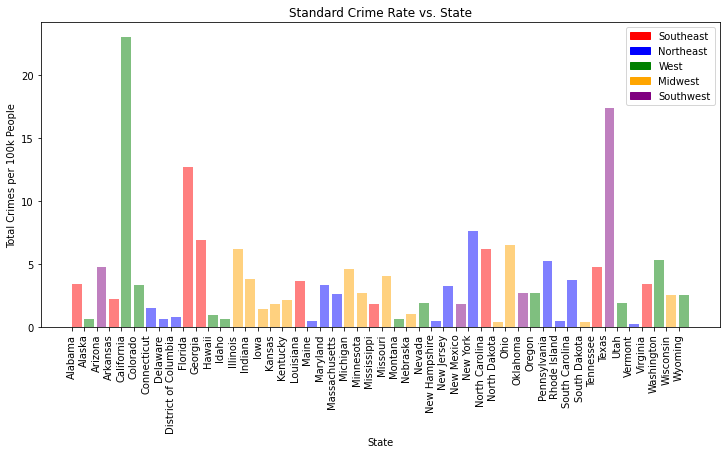

In [40]:
region_color_2= {"Southeast": "r", "Northeast": "b", 
              "West": "g", "Midwest": "orange", 
              "Southwest": "purple"}
labels = list(region_color.keys())
handles = [plt.Rectangle((0,0),1,1, color=region_color[label]) for label in labels]
# merged_df_fin["area_name"].plot(kind='bar', color=[region_color[i] for i in merged_df_fin["region"]])
x_axis=merged_df_fin["area_name"]
tick_locations=x_axis
y_axis =merged_df_fin['Total Crimes per 100k']
plt.figure(figsize=(10,6))
plt.bar(x_axis, y_axis, color=[region_color_2[i] for i in merged_df_fin["region"]],  alpha=0.5, align="edge")
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.tight_layout()
plt.legend(handles, labels, loc="upper right")
plt.ylabel("Total Crimes per 100k People")
plt.xlabel("State")
plt.title("Standard Crime Rate vs. State")
# plt.legend(handles=[state_hate_crime], loc="upper left") #TRYING TO ADD LEGEND W REGION COLORS
plt.show()

In [ ]:
regions_crime_box = merged_df_fin['region']
fig1, ax1 = plt.subplots()
ax1.set_title('Title')
ax1.set_ylabel('ylabel')
ax1.boxplot(regions_crime_box)
plt.show()

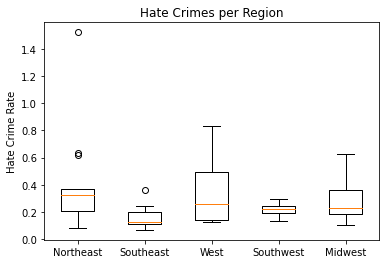

In [38]:
northeast_plot=merged_df_fin.loc[(merged_df_fin["region"]=="Northeast")]["hate_crimes_per_100k_splc"]
southeast_plot=merged_df_fin.loc[(merged_df_fin["region"]=="Southeast")]["hate_crimes_per_100k_splc"]
west_plot=merged_df_fin.loc[(merged_df_fin["region"]=="West")]["hate_crimes_per_100k_splc"]
southwest_plot=merged_df_fin.loc[(merged_df_fin["region"]=="Southwest")]["hate_crimes_per_100k_splc"]
midwest_plot=merged_df_fin.loc[(merged_df_fin["region"]=="Midwest")]["hate_crimes_per_100k_splc"]


data = [northeast_plot.dropna(), southeast_plot.dropna(), west_plot.dropna(), southwest_plot.dropna(), midwest_plot.dropna()]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title("Hate Crimes per Region")
x_ticks = [1,2,3,4,5]
plt.xticks(x_ticks,["Northeast", "Southeast", "West","Southwest", "Midwest"])
ax.set_ylabel("Hate Crime Rate")
# plt.savefig("../Images/")
plt.show()

In [ ]:
# Clean FBI Data set - take 2014-2018 data and average hate crimes fbi